# Otsu's Method

Automatic thresholding.

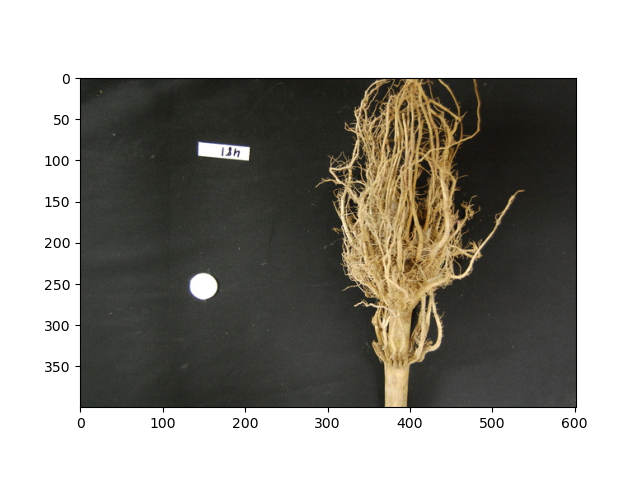

In [11]:
import glob

import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

%matplotlib widget
maize_roots = iio.imread(uri="../data/raw/training/maize-root-cluster.jpg")

fig, ax = plt.subplots()
ax.imshow(maize_roots)

(0.0, 1.0)

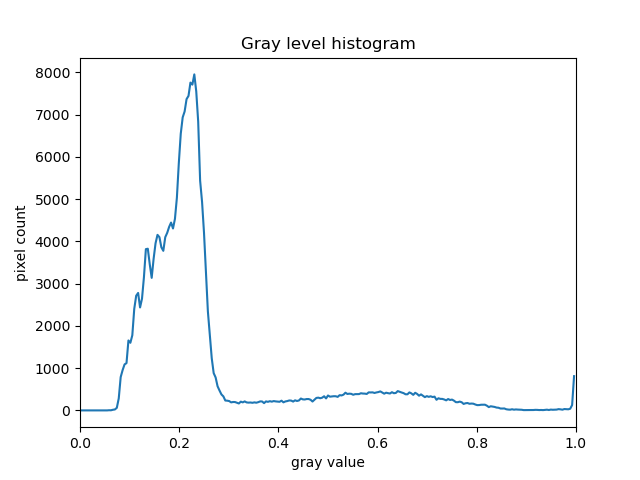

In [12]:
# convert the image to grayscale
gray_image = ski.color.rgb2gray(maize_roots)

# blur the image to de-noise
blurred_image = ski.filters.gaussian(gray_image, sigma=1.0)

# show the histogram of the blurred image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
ax.plot(bin_edges[:-1], histogram)
ax.set_title("Gray level histogram")
ax.set_xlabel("gray value")
ax.set_ylabel("pixel count")
ax.set_xlim(0, 1.0)

# Perform automatic thresholding

There are other thresholding techniques.

In [13]:
t = ski.filters.threshold_otsu(blurred_image)
print(f"Found automatic threshold t = {t}.")

Found automatic threshold t = 0.4116003928683858.


Create a binary mask with the threshold found by Otsu's method

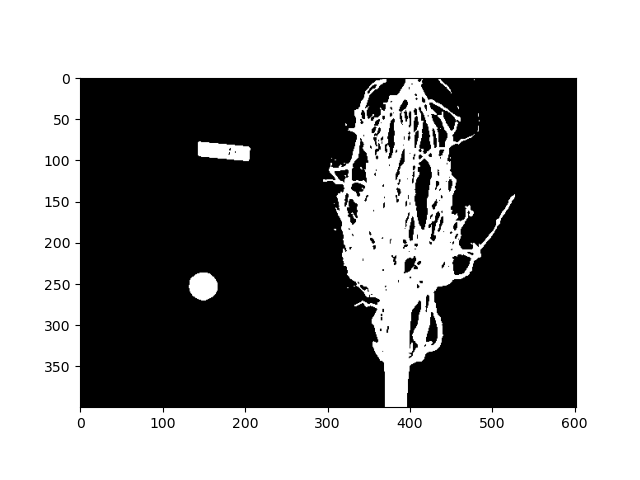

In [14]:

binary_mask = blurred_image > t

fig, ax = plt.subplots()
ax.imshow(binary_mask, cmap="gray")

Apply the binary mask to select the foreground

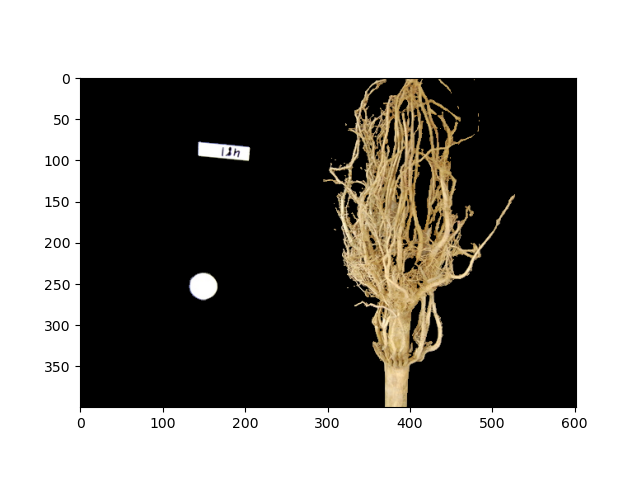

In [15]:
selection = maize_roots.copy()
selection[~binary_mask] = 0

fig, ax = plt.subplots()
ax.imshow(selection)

The seedling is rough so the edge detection is challenging.

# Measure the root mass

Need to know size of a pixel. 

In [ ]:
def measure_root_mass(filename, sigma=1.0):

    # read the original image, converting to grayscale on the fly
    image = iio.imread(uri=filename, mode="L")

    # blur before thresholding
    blurred_image = ski.filters.gaussian(image, sigma=sigma)

    # perform automatic thresholding to produce a binary image
    t = ski.filters.threshold_otsu(blurred_image)
    binary_mask = blurred_image > t

    # determine root mass ratio
    root_pixels = np.count_nonzero(binary_mask)
    w = binary_mask.shape[1]
    h = binary_mask.shape[0]
    return root_pixels / (w * h)